In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Data

In [2]:
from data import load_poem, make_paragraph, make_vocab, poem_to_tensor

poems = load_poem(2000, author='李白')
poems = make_paragraph(poems)
vocab, vocab_size = make_vocab(poems)
print("poems size: %d, vocab size: %d" % (len(poems), vocab_size))

poems size: 1206, vocab size: 3571


In [3]:
print('\n'.join(poems[:5]))

三十六離宮，樓臺與天通。閣道步行月，美人愁煙空。恩疎寵不及，桃李傷春風。淫樂意何極，金輿向回中。萬乘出黃道，千旗揚彩虹。前軍細柳北，後騎甘泉東。豈問渭川老，寧邀襄野童。秋暮瑤池宴，歸來樂未窮。
去年戰桑乾源，今年戰蔥河道。洗兵條支海上波，放馬天山雪中草。萬里長征戰，三軍盡衰老。匈奴以殺戮爲耕作，古來唯見白骨黃沙田。秦家築城備胡處，漢家還有烽火然。烽火然不息，征戰無已時。野戰格鬬死，敗馬號鳴向天悲。烏鳶啄人腸，銜飛上挂枯樹枝。士卒塗草莽，將軍空爾爲。乃知兵者是凶器，聖人不得已而用之。
君不見黃河之水天上來，奔流到海不復回。君不見高堂明鏡悲白髮，朝如青絲暮成雪。人生得意須盡歡，莫使金尊空對月。天生我材必有用，千金散盡還復來。烹羊宰牛且爲樂，會須一飲三百杯。岑夫子，丹丘生，將進酒，杯莫停。與君歌一曲，請君爲我側耳聽。鐘鼓饌玉不足貴，但願長醉不復醒。古來聖賢皆寂寞，惟有飲者留其名。陳王昔時宴平樂，斗酒十千恣歡謔。主人何爲言少錢，徑須酤取對君酌。五花馬，千金裘，呼兒將出換美酒，與爾同銷萬古愁。
君馬黃，我馬白。馬色雖不同，人心本無隔。共作遊冶盤，雙行洛陽陌。長劒既照曜，高冠何赩赫。各有千金裘，俱爲五侯客。猛虎落陷穽，壯夫時屈厄。相知在急難，獨好亦何益。
我思仙人，乃在碧海之東隅。海寒多天風，白波連山倒蓬壺。長鯨噴湧不可涉，撫心茫茫淚如珠。西來青鳥東飛去，願寄一書謝麻姑。


## Train

In [12]:
from model import RNN
from solver import Solver

model = RNN(vocab_size, 256, 256)
solver = Solver(model, poems, vocab, 
                num_epochs=10000, 
                learning_rate=1e-3, 
                save_every = 1000,
                print_every=100, 
                plot_every=10, 
                verbose=True)

In [13]:
solver.train()

KeyboardInterrupt: 

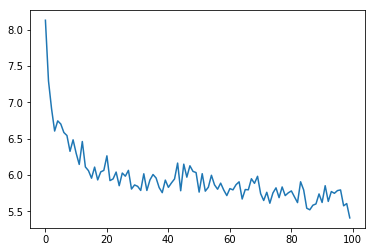

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [7]:
predicted = solver.evaluate(start_with='君不見黃河之水天上來')
print("length: %d, %s" % (len(predicted), predicted))

length: 42, 君不见黄河之水天上来，长然空爲前草。徒李浮贤欢，祇默玉安端。能净长影牖，北如如游发。
